In [1]:
from api import API

/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['washing machine','fridge'],
  'methods': {
     'Mean': {},
      "FHMM_EXACT":{},"RNN":{'n_epochs':50,'batch_size':1024},"Seq2Point":{'n_epochs':50,'batch_size':1024},
      "Seq2Seq":{'n_epochs':50,'batch_size':1024},"DAE":{'n_epochs':50,'batch_size':1024},"WindowGRU":{'n_epochs':30,'batch_size':1024}

  },
 'train': {
    'datasets': {
      'UKDALE': {
        'path': '../ukdale.h5',
        'buildings': {
              1: {
                'start_time': '2017-01-05',
                'end_time': '2017-03-05'
              },
          
        }
      },
        
    }
  },
    
  'test': {
    'datasets': {
      'DRED': {
        'path': '../DRED.h5',
        'buildings': {
              1: {
                    'start_time': '2015-09-21',
                    'end_time': '2015-10-01'
          }
        }
      },
      'REDD': {
        'path': '../redd.h5',
        'buildings': {
              1: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
          }
        }
      }
    },
    'metrics': ['mae']
  }
}

Joint Testing for all algorithms
Loading data for  DRED  dataset
Dropping missing values
 test New mains shape
(14302, 99, 1)
New testing
Length
14302
Max input
-0.063638888888889 -2.9470972222222223
test predictions  [       washing machine      fridge
0             5.383861   11.696179
1             5.383861   75.956383
2             5.383861   89.964264
3             5.383861   90.262123
4             5.383861   90.488930
5             5.383861   94.606606
6             5.383861  101.360031
7             5.383861  102.065613
8             5.383861   87.440536
9             5.383861    8.273700
10            5.383861    5.644284
11            5.383861    3.894175
12            5.383861    3.884084
13            5.383861    3.975074
14            5.383861    4.499654
15            5.383861    5.241539
16            5.383861    5.868815
17            5.383861    8.387055
18            5.383861   10.221043
19            5.383861   45.493820
20            5.383861   98.576012
21         

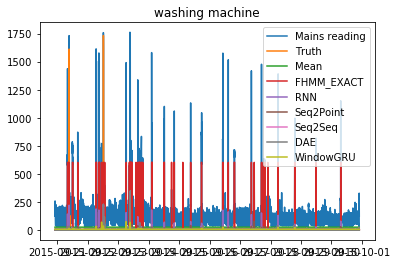

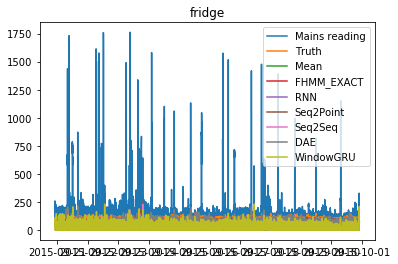

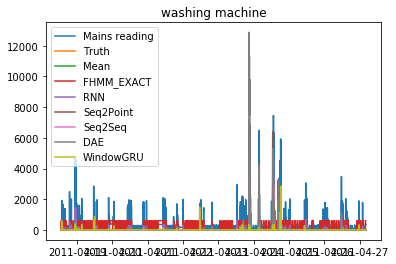

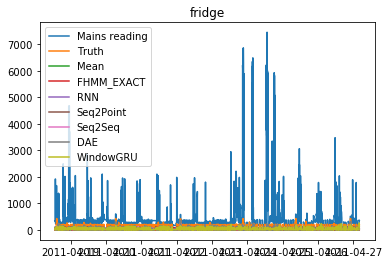

In [3]:
api_res = API(redd)


In [4]:
for i in api_res.errors:
    print (i)
    print ('\n')

                      Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
washing machine  25.636555   19.048719   7.311409   3.071829   2.881142   
fridge           43.427475   32.348988  27.826031  17.053637  18.503485   

                       DAE  WindowGRU  
washing machine   3.759235   6.861619  
fridge           16.861113  24.355362  


                      Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
washing machine  47.244759  179.579819  19.217882  25.527681  23.327898   
fridge           62.311844   95.931847  50.921852  44.195366  40.976631   

                       DAE  WindowGRU  
washing machine  50.086334  29.527494  
fridge           41.661190  36.400978  




In [5]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("STD")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                      Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
washing machine  36.440657   99.314269  13.264646  14.299755  13.104520   
fridge           52.869659   64.140417  39.373941  30.624501  29.740058   

                       DAE  WindowGRU  
washing machine  26.922785  18.194557  
fridge           29.261151  30.378170  



STD
                      Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
washing machine  10.804102    80.26555   5.953236  11.227926  10.223378   
fridge            9.442184    31.79143  11.547911  13.570865  11.236573   

                       DAE  WindowGRU  
washing machine  23.163550  11.332938  
fridge           12.400039   6.022808  
